![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## First example of Neural Network for the Master of Data Science at Nuclio School


Let's remember the steps to follow in creating code to train a neural network:
<ol>
    <li> Import libraries: Keras, PyPlot and Numpy (I add time and datetime to control training times) </li>
    <li> Let's define an initial network (stacking blocks) </li>
    <li> We define (or create) our optimizer, adding our error function </li>
    <li> We prepare the data (in this case we load it) </li>
    <li> We start with the training </li>
    <li> We look at the results and iterate </li>
</ol>

## 1. Libraries

To start, let's load those libraries that we need

In [1]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

## 2. Architecture of the network

We build a simple neural network model for the MNIST data, which in summary are:
- Input data: 28x28 pixel images with a gray channel (values ​​from 1 to 256, integers)
- Output data (labels): we give each image a value from 0 to 9, a total of 10 classes

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Examples-from-the-MNIST-dataset.png">

To assemble the architecture of the neural network, the method **. Sequential()** of Keras (from input to output) is followed:

- **Input** - A conversion of a 28x28 pixel 2D matrix to a vector - Flatten method
- **Hidden** - A dense layer (fully connected) with 16 neurons and linear activation
- **Output** - A dense layer (fully connected) with 10 neurons (** the 10 output classes **) and linear activation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/399px-Colored_neural_network.svg.png" alt="" decoding="async" width="300" height="361" class="thumbimage">

In [33]:
x_train[0].shape

(28, 28)

In [48]:
model = ks.Sequential()

model.add(ks.layers.Flatten(input_shape=(28, 28)))
model.add(ks.layers.Dense(60, activation='relu'))
model.add(ks.layers.Dense(20, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))


In [49]:
28*28

784

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 60)                47100     
                                                                 
 dense_5 (Dense)             (None, 20)                1220      
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
Total params: 48,530
Trainable params: 48,530
Non-trainable params: 0
_________________________________________________________________


To review a model, we just have to call the **.Summary()** method of the model

Very relevant information is extracted from the **.Summary()**: the number of parameters per layer and the total to be trained.

Notice that 28x28 are 784 values, so that's what we have from the start. Those 784 neurons are linked with 16 (16 * 784 weights + 16 bias = 12560) and those 16 with the 10 output (16 * 10 weights + 10 bias). A total of 12,730 parameters to learn

## 3. Optimizer, error function

We define the parameters of the model for its training:
* **Loss** - Error function (cost function) - We opted for the Sparse Categorical Crosstentropy because we are classifying images
* **Optimizer** - which cost function optimizer we will use, in this example SGD (Stochastic gradient descent)
* **Metrics** - which metric we will use to evaluate the model ... in this case the Accuracy is used

**Note on SGD:** by default it has a learning rate of 0.01 and without momentum (value of 0.0)

In [51]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

## 4. We prepare the data

We load the MNIST data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 28x28 matrices (which have values ​​from 0 to 255) by 255.0 (a real)

In [7]:
mnist = ks.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [28]:
x_train.shape

(50000, 28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [11]:
x_train[0, 14, 14]

240

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.max()

1.0

In [14]:
x_train.min()

0.0

Let's paint a sample of the MNIST dataset images, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **.Get_cmap()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


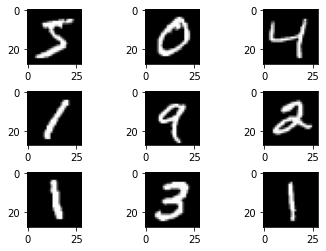

In [15]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.subplots_adjust(hspace = 0.5)
plt.show()

We are we going to want to validate while we train (very practical)

In [16]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [17]:
x_train.shape

(50000, 28, 28)

In [18]:
x_val.shape

(10000, 28, 28)

## 5. Training

We can start training the model!

We will start with 30 epochs, that is, 30 complete passes of the dataset (which in turn will be with mini-batches internally), by default in Keras, **the batch_size is 32**.

The .fit() method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

**Note: This fit, on my laptop does not take more than 2 minutes.** (That is why it is worth capturing the times, so you can validate the capabilities of your team and evaluate Google Colab).

In [52]:
t = time.perf_counter()

In [53]:
history = model.fit(x_train, y_train, epochs=30, use_multiprocessing=False, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8105 - accuracy: 0.7718 - val_loss: 0.3564 - val_accuracy: 0.9013
Epoch 2/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.3380 - accuracy: 0.9037 - val_loss: 0.2770 - val_accuracy: 0.9205
Epoch 3/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2790 - accuracy: 0.9197 - val_loss: 0.2422 - val_accuracy: 0.9279
Epoch 4/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2425 - accuracy: 0.9304 - val_loss: 0.2128 - val_accuracy: 0.9388
Epoch 5/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2157 - accuracy: 0.9374 - val_loss: 0.1919 - val_accuracy: 0.9455
Epoch 6/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1957 - accuracy: 0.9432 - val_loss: 0.1790 - val_accuracy: 0.9490
Epoch 7/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1788 - accuracy: 0.9475 - val_loss: 0.1679 - val_accuracy:

In [21]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:01:29.399882


## 6. We evaluate the results

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

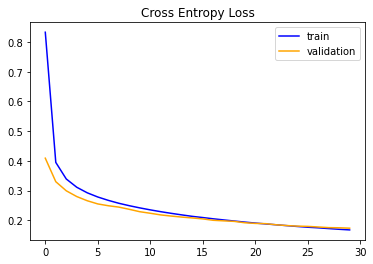

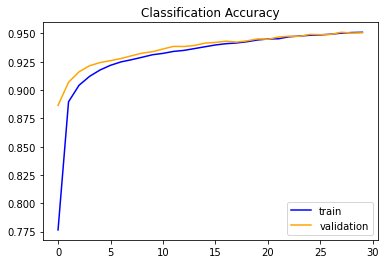

In [40]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

Let's evaluate the model against the test values

In [47]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1785 - accuracy: 0.9466 - 227ms/epoch - 726us/step


[0.17848323285579681, 0.9466000199317932]

In [54]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0980 - accuracy: 0.9711 - 243ms/epoch - 776us/step


[0.09802819788455963, 0.9710999727249146]

The cost we can see that it is stable. Also, accuracy dances a lot. It cannot be said that it is a very good model.

Let's see what kind of predictions I'm getting about the test set (let's paint the images and their classifications)

In [56]:
predictions = model.predict(x_test)

One of the advantages of Python is that there are loads of functions and code made by third parties. Here I have shot some nice functions (which I have adapted a bit to my needs) to be able to paint the images, their label (ground truth) and the classifications that we have made.

In [45]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

We draw the first digits, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red

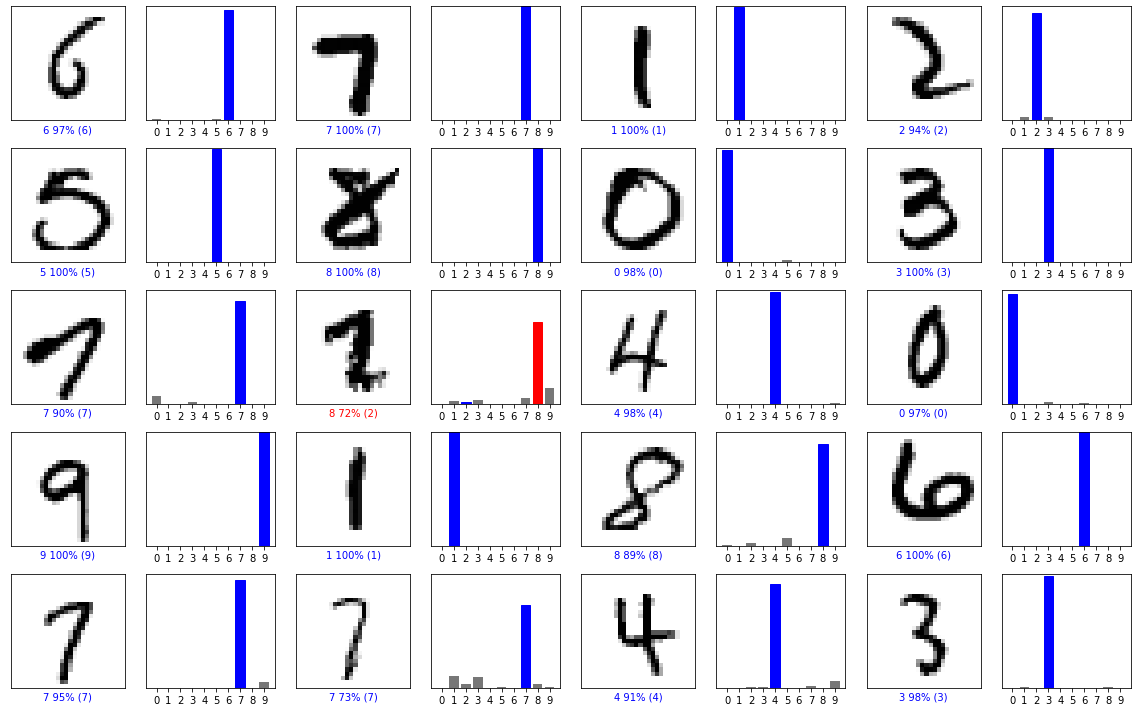

In [46]:
num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

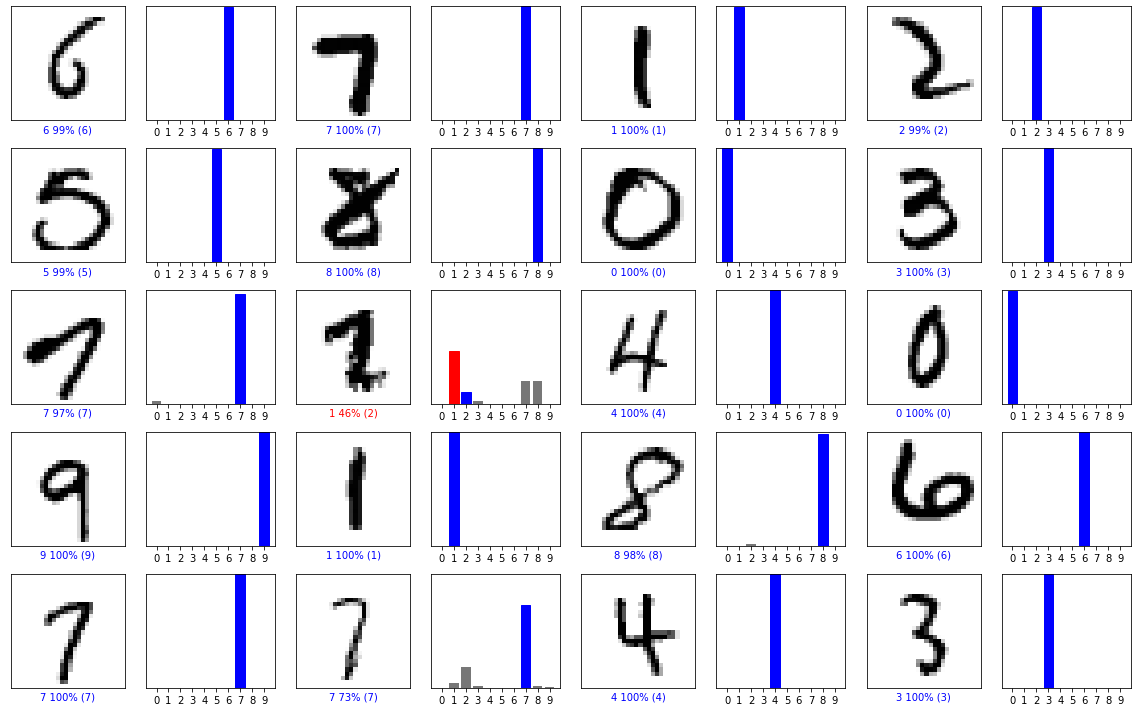

In [57]:
num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('mnist_model.h5')